In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 5.0 MB/s 


In [ ]:
pip install mne-features

     |████████████████████████████████| 40 kB 2.8 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=2aa3d1d7a6327b60b09bdf66b58013e4403e3c7466cfd2f2889e7592d80fbc04
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [ ]:
pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas

In [ ]:
pip install git+https://github.com/mne-tools/mne-features.git#egg=mne_features

  Cloning https://github.com/mne-tools/mne-features.git to /tmp/pip-install-pin2b5ue/mne-features_4deaeae7caca4840b9da83a095593eb7
  Running command git clone -q https://github.com/mne-tools/mne-features.git /tmp/pip-install-pin2b5ue/mne-features_4deaeae7caca4840b9da83a095593eb7


In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 2.6 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=a1a3b6fb9af21639fe294b88d7760d4dbc4cc1191d4b1a6f4e6ea6f3e07295bd
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,543,-166,192,230,573,860,128,59,272,473,325,379,536,348,383,105,607,289,459,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,495,-138,201,233,554,846,185,47,269,455,307,368,529,327,369,78,613,248,409,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,534,-163,198,207,542,768,145,52,250,452,273,273,511,319,355,66,606,320,440,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,525,-310,212,221,542,808,115,41,276,432,258,241,521,336,356,71,568,339,437,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,507,-320,242,230,545,865,180,89,288,444,275,275,550,324,346,76,547,343,446,171,67,581,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,40,9,-95,73,-89,233,292,-85,-38,74,-34,2,-305,383,85,-1,444,337,-255,160,-121,-285,-178,subj1_series1_119491,0,0,0,0,0,0
119492,119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,54,256,-224,49,-99,264,304,-210,-59,63,-19,10,-283,334,61,-8,427,322,-310,107,-152,-295,-178,subj1_series1_119492,0,0,0,0,0,0
119493,119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,72,253,-394,35,-134,241,104,-164,-52,45,-45,16,-185,303,53,-24,438,368,-134,187,-99,-269,-121,subj1_series1_119493,0,0,0,0,0,0
119494,119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,67,184,-260,42,-112,232,-168,-119,-30,54,-51,26,-177,341,50,-25,444,348,-135,181,-122,-290,-77,subj1_series1_119494,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(train_complete)

In [ ]:
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)
new_data

,order,C3,Cz,C4,P3,Pz,P4,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,192,230,573,348,383,105,0,0,0,0,0,0
1,1,201,233,554,327,369,78,0,0,0,0,0,0
2,2,198,207,542,319,355,66,0,0,0,0,0,0
3,3,212,221,542,336,356,71,0,0,0,0,0,0
4,4,242,230,545,324,346,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,73,-89,233,85,-1,444,0,0,0,0,0,0
119492,119492,49,-99,264,61,-8,427,0,0,0,0,0,0
119493,119493,35,-134,241,53,-24,438,0,0,0,0,0,0
119494,119494,42,-112,232,50,-25,444,0,0,0,0,0,0


In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4


0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
Cz

0         230
1         233
2         207
3         221
4         230
         ... 
119491    -89
119492    -99
119493   -134
119494   -112
119495   -113
Name: Cz, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:

P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

In [ ]:
FDT = new_data.loc[:,"FirstDigitTouch"]
FDT

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: FirstDigitTouch, Length: 119496, dtype: int64

## **C3 Channel**

[411, 430, 446, 413, 358, 386, 381, 367, 391, 382, 345, 355, 388, 409, 402, 431, 452, 443, 414, 444, 433, 431, 458, 479, 444, 433, 450, 454, 460, 464, 468, 483, 504, 467, 472, 479, 479, 473, 430, 451, 463, 436, 448, 474, 477, 461, 424, 416, 417, 417, 369, 369, 419, 406, 376, 353, 353, 387, 388, 399, 410, 382, 374, 401, 435, 427, 449, 436, 442, 451, 461, 421, 403, 438, 410, 437, 466, 484, 396, 391, 447, 415, 423, 428, 452, 460, 449, 417, 397, 402, 424, 394, 376, 389, 362, 347, 326, 345, 376, 390, 395, 390, 369, 403, 406, 397, 418, 405, 407, 435, 432, 401, 392, 404, 377, 416, 442, 419, 409, 409, 407, 416, 416, 422, 412, 360, 378, 441, 473, 423, 380, 386, 366, 362, 371, 408, 424, 379, 416, 412, 408, 420, 444, 424, 389, 385, 397, 393, 380, 423, 380, 369, 395, 366, 388, 352, 348, 387, 391, 407, 410, 413, 422, 411, 433, 425, 433, 424, 398, 415, 422, 415, 436, 400, 373, 436, 406, 402, 459, 452, 453, 459, 456, 477, 501, 477, 461, 487, 509, 500, 470, 453, 431, 433, 494, 521, 452, 432, 436, 477,

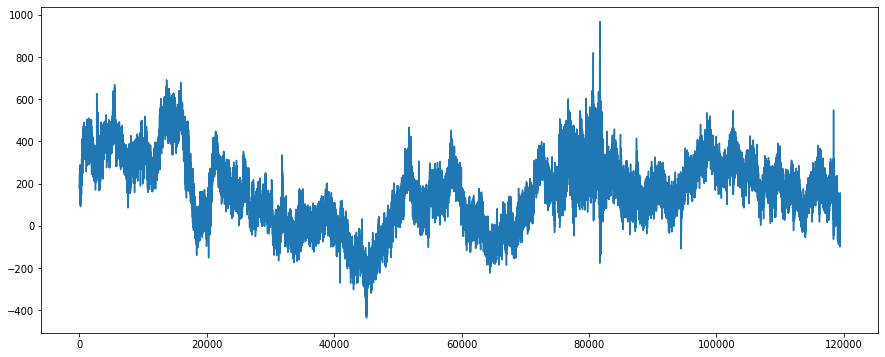

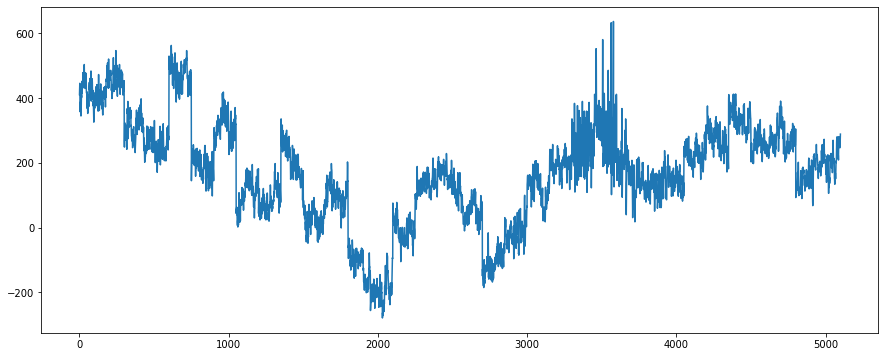

In [ ]:
C3_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    C3_fdt.append(C3[i])
 
print(C3_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3_fdt)

<Figure size 1440x432 with 0 Axes>

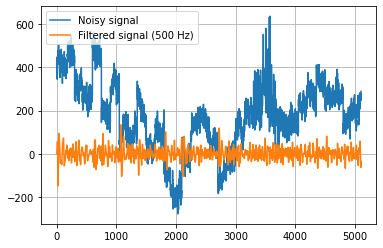

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_fdt, label='Noisy signal')

y = butter_bandpass_filter(C3_fdt, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y))

5100


In [ ]:
from scipy.stats import norm, kurtosis
from scipy.stats import skew
import statistics

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5
kurtosis = kurtosis(y)
skewness = skew(y)
peak2peak = max(y)-min(y)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  803.3940746643678
median =  -0.6060407346893864
mean =  -0.015932133623289678
Standard Deviation =  28.344207074186567
kurtosis =  1.5682063913023407
skewness =  0.0924486674714641
Peak to peak =  283.69927557540984


In [ ]:
import mne
import mne_features

In [ ]:
#1.mean
mne_features.univariate.compute_mean(y)

-0.015932133623289678

In [ ]:
#2.median
median = np.median(y)
median

-0.6060407346893864

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y)

803.3940746643678

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y)

28.344207074186567

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y)

4.568206391302341

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y)

0.0924486674714641

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y)

283.69927557540984

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y)

28.341432572248628

In [ ]:
#Freqeuncy Domain
#9.power spectrum density
mne_features.utils.power_spectrum(500,y)

(array([4.11845736e-01, 2.61813908e-01, 7.93550076e-01, 2.52545069e+01,
        8.34330074e+01, 8.17296668e+01, 4.45925622e+01, 4.25892033e+01,
        2.14565869e+01, 1.49266401e+01, 1.66945571e+01, 2.27996444e+01,
        1.84875533e+01, 2.15322733e+01, 1.49879442e+01, 1.02967740e+01,
        6.14546781e+00, 2.35805766e+00, 6.46344724e-01, 2.84686886e-01,
        9.89488585e-02, 2.29430411e-02, 2.21207449e-02, 1.82281540e-02,
        4.99863877e-03, 2.83164590e-03, 1.87537580e-03, 1.30270771e-03,
        1.53197718e-03, 1.14750498e-03, 7.66178188e-04, 5.80130063e-04,
        5.72732466e-04, 4.81322734e-04, 4.43684024e-04, 3.94870342e-04,
        3.58967591e-04, 3.48681585e-04, 3.29280262e-04, 2.94785077e-04,
        2.80589582e-04, 2.62713463e-04, 2.50086040e-04, 2.36232364e-04,
        2.24301401e-04, 2.11957569e-04, 2.04776063e-04, 1.95102079e-04,
        1.83196067e-04, 1.77412311e-04, 1.70953096e-04, 1.63132447e-04,
        1.56807141e-04, 1.51442674e-04, 1.44561846e-04, 1.407169

In [ ]:
import numpy as np
import antropy as ant

#10. Spectral entropy
print(ant.spectral_entropy(y, sf=500, method='welch', normalize=True))

0.5115094011685649


In [ ]:
#11. Approximate entropy
print(ant.app_entropy(y))

0.6078519816331092


In [ ]:
#12.zero crossing
import numpy

zs = numpy.where(numpy.diff(numpy.sign(y)))[0]
zs
print(len(zs))

331


## C4 

[620, 666, 658, 667, 703, 686, 612, 640, 652, 627, 663, 668, 672, 686, 682, 715, 759, 736, 741, 747, 683, 685, 655, 668, 719, 749, 750, 733, 717, 729, 724, 737, 716, 698, 726, 726, 728, 730, 700, 700, 712, 716, 719, 741, 743, 723, 724, 722, 720, 709, 720, 705, 691, 697, 667, 664, 637, 629, 655, 669, 657, 641, 655, 656, 617, 588, 625, 622, 648, 655, 636, 635, 656, 633, 639, 682, 625, 586, 633, 638, 635, 646, 669, 655, 656, 693, 716, 707, 669, 705, 716, 663, 646, 670, 689, 662, 669, 698, 641, 653, 663, 628, 679, 658, 620, 664, 684, 668, 665, 669, 676, 676, 654, 675, 607, 615, 648, 618, 653, 636, 629, 621, 609, 641, 619, 630, 653, 625, 583, 626, 565, 583, 610, 590, 595, 614, 620, 601, 618, 622, 585, 599, 613, 639, 646, 630, 661, 646, 642, 705, 516, 489, 483, 487, 455, 416, 456, 471, 465, 504, 530, 537, 546, 531, 543, 544, 554, 518, 515, 533, 529, 485, 491, 473, 476, 482, 472, 500, 521, 523, 514, 541, 509, 536, 547, 542, 505, 518, 539, 550, 546, 554, 565, 559, 532, 512, 504, 502, 505, 502,

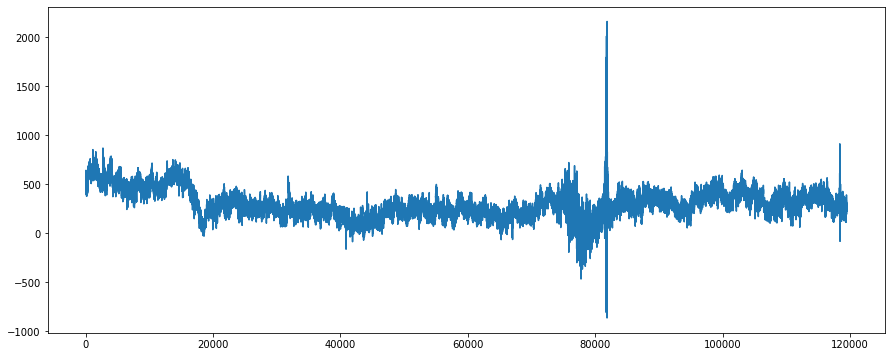

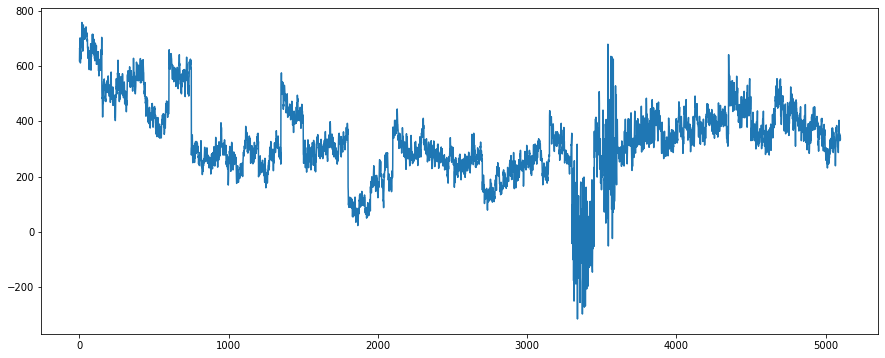

In [ ]:
C4_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    C4_fdt.append(C4[i])
 
print(C4_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4_fdt)

<Figure size 1440x432 with 0 Axes>

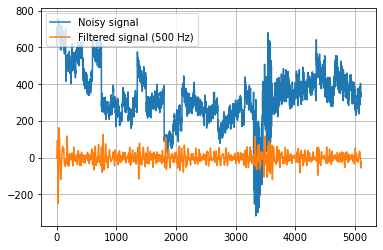

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_fdt, label='Noisy signal')

y2 = butter_bandpass_filter(C4_fdt, lowcut, highcut, fs, order=6)

plt.plot( y2, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y2))

5100


In [ ]:
y2 = np.array(y2)
import statistics

median = np.median(y2)
mean = y2.mean()
var = statistics.variance(y2)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y2)
peak2peak = max(y2)-min(y2)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1008.1924806331601
median =  -0.5883070930585413
mean =  -0.016960017902010353
Standard Deviation =  31.75204687312552
kurtosis =  1.5682063913023407
skewness =  -0.2164147945547652
Peak to peak =  414.9992329718529


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y2)

-0.016960017902010353

In [ ]:
#2.median
median = np.median(y2)
median

-0.5883070930585413

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y2)

1008.1924806331602

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y2)

31.752046873125522

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y2)

8.458924341590716

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y2)

-0.2164147945547652

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y2)

414.9992329718529

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y2)

31.748938304693645

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y2)

(array([3.70800180e-01, 3.25423066e-01, 1.30231141e+00, 2.84183991e+01,
        9.61937003e+01, 5.90013654e+01, 4.71928697e+01, 2.54396808e+01,
        3.27359670e+01, 3.39655765e+01, 1.90374958e+01, 1.66029156e+01,
        1.35558411e+01, 1.85153098e+01, 1.26745327e+01, 6.90380110e+00,
        4.40543773e+00, 1.85781918e+00, 6.46152661e-01, 1.53878103e-01,
        1.03578980e-01, 3.54073568e-02, 1.76708700e-02, 1.09500787e-02,
        7.98636372e-03, 3.90795199e-03, 2.55909870e-03, 2.85239189e-03,
        1.71281200e-03, 1.81521737e-03, 1.69285668e-03, 1.83727614e-03,
        1.00027620e-03, 1.30124900e-03, 1.33405586e-03, 9.04766101e-04,
        9.81670267e-04, 9.33970943e-04, 8.80888543e-04, 7.91814098e-04,
        7.12193352e-04, 7.36940717e-04, 6.79411061e-04, 6.56887282e-04,
        6.35077617e-04, 5.83094290e-04, 5.52898706e-04, 5.46714848e-04,
        5.20456483e-04, 5.01797343e-04, 4.81214915e-04, 4.58175172e-04,
        4.45260751e-04, 4.30675790e-04, 4.12082731e-04, 4.021195

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y2, sf=500, method='welch', normalize=True))

0.5204788845703825


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y2))

0.576205338661242


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y2))

zs = numpy.where(numpy.diff(numpy.sign(y2)))[0]
zs

333


array([  17,   30,   55,   85,  124,  167,  181,  191,  197,  213,  227,
        235,  246,  253,  262,  280,  298,  324,  336,  350,  376,  390,
        397,  409,  438,  452,  464,  479,  488,  492,  503,  509,  520,
        528,  538,  561,  572,  579,  595,  607,  616,  631,  653,  680,
        684,  693,  708,  725,  731,  743,  754,  767,  781,  807,  830,
        841,  845,  866,  898,  935,  953,  956,  961,  975,  987, 1001,
       1003, 1009, 1019, 1031, 1040, 1044, 1058, 1069, 1076, 1103, 1119,
       1139, 1152, 1180, 1188, 1195, 1208, 1217, 1229, 1253, 1279, 1304,
       1323, 1344, 1367, 1381, 1407, 1435, 1460, 1485, 1506, 1517, 1529,
       1556, 1576, 1596, 1605, 1619, 1637, 1643, 1654, 1671, 1686, 1703,
       1727, 1744, 1752, 1764, 1784, 1798, 1801, 1817, 1831, 1855, 1888,
       1908, 1946, 1959, 1966, 1979, 2007, 2019, 2022, 2038, 2061, 2082,
       2100, 2110, 2112, 2129, 2161, 2190, 2212, 2249, 2264, 2274, 2292,
       2305, 2308, 2325, 2341, 2375, 2389, 2397, 24

## **Cz Channel**

[122, 138, 143, 147, 144, 131, 106, 105, 98, 91, 115, 106, 114, 122, 105, 134, 147, 147, 130, 127, 111, 116, 127, 150, 167, 152, 161, 153, 132, 146, 154, 157, 178, 163, 170, 185, 176, 161, 153, 147, 153, 157, 147, 178, 187, 174, 162, 163, 141, 135, 139, 125, 111, 101, 106, 89, 88, 102, 120, 128, 126, 117, 126, 119, 133, 117, 108, 104, 116, 121, 134, 109, 102, 106, 120, 122, 116, 134, 128, 109, 118, 113, 111, 102, 126, 148, 138, 101, 83, 97, 124, 123, 108, 112, 92, 82, 82, 109, 102, 110, 89, 82, 84, 71, 83, 100, 109, 78, 94, 102, 97, 74, 88, 120, 101, 110, 113, 98, 112, 95, 83, 77, 107, 112, 96, 69, 92, 95, 87, 116, 106, 74, 73, 72, 77, 91, 104, 120, 123, 116, 114, 143, 160, 146, 146, 136, 142, 147, 127, 156, 48, 42, 42, 46, 41, 30, 36, 36, 40, 57, 84, 70, 70, 76, 82, 79, 91, 62, 60, 63, 51, 39, 35, 4, 24, 45, 34, 51, 77, 71, 76, 86, 57, 61, 74, 83, 71, 79, 95, 92, 89, 84, 94, 104, 105, 88, 85, 71, 64, 71, 86, 109, 105, 98, 115, 103, 98, 79, 88, 93, 82, 93, 87, 65, 79, 46, 43, 71, 68, 7

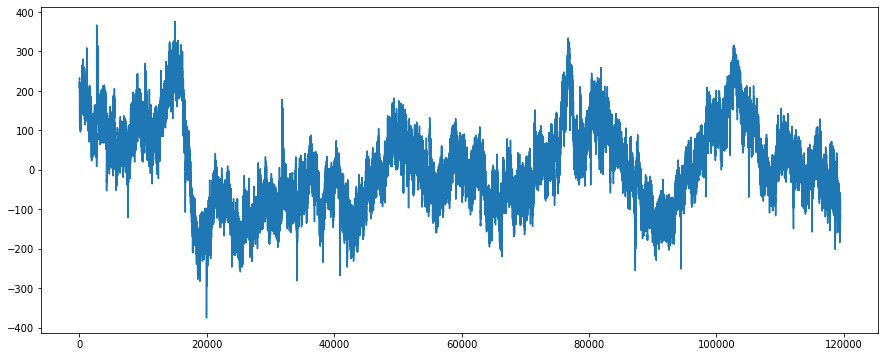

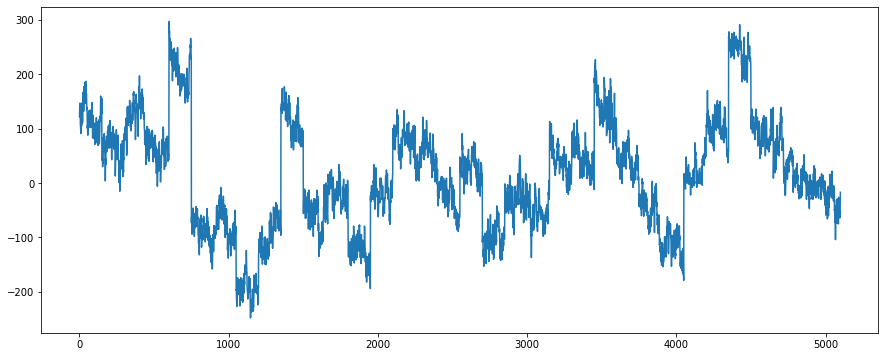

In [ ]:
Cz_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    Cz_fdt.append(Cz[i])
 
print(Cz_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz_fdt)

<Figure size 1440x432 with 0 Axes>

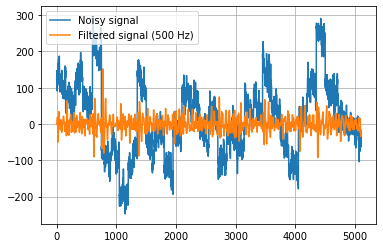

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_fdt, label='Noisy signal')

y3 = butter_bandpass_filter(Cz_fdt, lowcut, highcut, fs, order=6)

plt.plot( y3, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y3))

5100


In [ ]:
y3 = np.array(y3)
import statistics

median = np.median(y3)
mean = y3.mean()
var = statistics.variance(y3)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y3)
peak2peak = max(y3)-min(y3)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  470.1538453863877
median =  -0.33842159424035434
mean =  -0.014606099120047103
Standard Deviation =  21.68303127762324
kurtosis =  1.5682063913023407
skewness =  0.2812032733275966
Peak to peak =  244.42488427136732


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y3)

-0.014606099120047103

In [ ]:
#2.median
median = np.median(y3)
median

-0.33842159424035434

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y3)

470.1538453863877

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y3)

21.68303127762324

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y3)

6.19173512872691

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y3)

0.2812032733275966

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y3)

244.42488427136732

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y3)

21.68091030598144

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y3)

(array([2.89158229e-01, 2.37596335e-01, 4.60880134e-01, 1.47307895e+01,
        4.83901151e+01, 3.28926892e+01, 2.74663788e+01, 1.48753501e+01,
        1.38973170e+01, 1.07248739e+01, 1.13400782e+01, 1.27523366e+01,
        1.08111532e+01, 1.01513844e+01, 6.64192926e+00, 5.65025583e+00,
        3.19064176e+00, 9.21981239e-01, 3.11057980e-01, 8.30639151e-02,
        4.47452197e-02, 1.20428585e-02, 7.30500005e-03, 5.26208382e-03,
        2.31393444e-03, 2.23585654e-03, 1.16429273e-03, 8.50146644e-04,
        7.62626329e-04, 6.85368365e-04, 5.24327509e-04, 4.71710083e-04,
        4.16586897e-04, 4.25448894e-04, 3.44822435e-04, 3.40882268e-04,
        3.13238994e-04, 2.86939030e-04, 2.83824767e-04, 2.59434469e-04,
        2.41053268e-04, 2.35669724e-04, 2.18969352e-04, 2.08796308e-04,
        2.01455089e-04, 1.88232552e-04, 1.82067290e-04, 1.74511322e-04,
        1.65385029e-04, 1.59544417e-04, 1.53418083e-04, 1.46844916e-04,
        1.42028947e-04, 1.36670097e-04, 1.31940010e-04, 1.273247

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y3, sf=500, method='welch', normalize=True))

0.5052230466661096


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y3))

0.5845003013250589


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))

zs = numpy.where(numpy.diff(numpy.sign(y3)))[0]
zs

331


array([  16,   29,   53,   69,   77,   97,  126,  147,  154,  167,  180,
        190,  196,  211,  240,  255,  261,  276,  294,  308,  318,  330,
        341,  350,  370,  387,  400,  407,  415,  426,  436,  445,  464,
        479,  520,  533,  542,  557,  571,  579,  598,  609,  616,  630,
        652,  681,  707,  724,  732,  744,  752,  766,  781,  807,  830,
        863,  869,  876,  907,  929,  956,  992, 1000, 1007, 1021, 1032,
       1040, 1052, 1057, 1066, 1080, 1104, 1131, 1141, 1151, 1165, 1171,
       1180, 1189, 1195, 1218, 1233, 1256, 1282, 1292, 1302, 1316, 1328,
       1333, 1345, 1367, 1380, 1405, 1433, 1466, 1489, 1502, 1517, 1530,
       1554, 1585, 1602, 1604, 1616, 1632, 1660, 1685, 1711, 1734, 1747,
       1756, 1763, 1780, 1797, 1811, 1817, 1832, 1857, 1884, 1900, 1909,
       1934, 1949, 1957, 1967, 1981, 2005, 2042, 2066, 2088, 2103, 2128,
       2145, 2154, 2161, 2191, 2217, 2256, 2282, 2308, 2314, 2323, 2339,
       2351, 2358, 2373, 2384, 2394, 2406, 2416, 24

## **P3 Channel**

[420, 426, 435, 447, 449, 445, 436, 437, 422, 380, 405, 414, 429, 481, 458, 502, 548, 533, 498, 528, 498, 460, 499, 514, 544, 563, 565, 575, 567, 591, 587, 577, 595, 567, 562, 565, 558, 520, 484, 487, 478, 488, 521, 565, 568, 497, 415, 481, 502, 453, 463, 474, 470, 393, 387, 389, 389, 422, 441, 470, 491, 443, 431, 452, 477, 499, 525, 500, 517, 518, 534, 488, 465, 498, 475, 471, 477, 501, 485, 462, 481, 485, 473, 467, 498, 524, 546, 505, 468, 475, 488, 473, 466, 466, 442, 408, 407, 427, 416, 459, 451, 436, 421, 422, 442, 453, 498, 494, 505, 520, 480, 481, 478, 522, 506, 526, 549, 533, 544, 557, 519, 489, 493, 468, 441, 429, 453, 457, 490, 522, 474, 469, 460, 442, 433, 482, 501, 488, 510, 505, 493, 544, 554, 559, 545, 551, 538, 532, 556, 612, 338, 347, 351, 331, 345, 322, 280, 279, 288, 345, 375, 377, 405, 386, 406, 385, 380, 378, 361, 355, 361, 353, 365, 308, 305, 352, 322, 346, 416, 412, 401, 416, 410, 429, 437, 449, 429, 449, 465, 445, 425, 401, 396, 400, 457, 471, 441, 392, 368, 400,

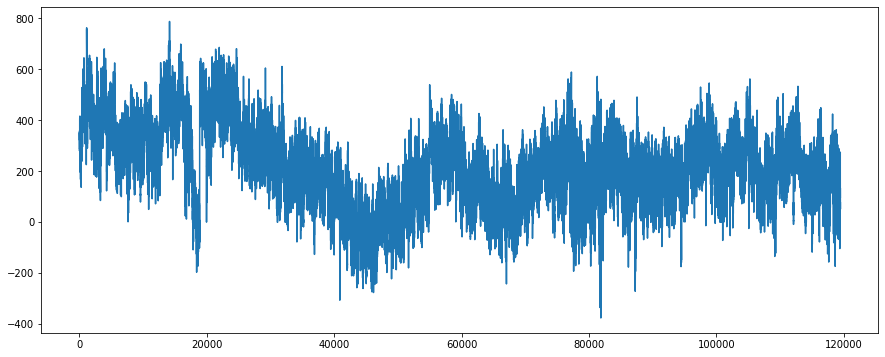

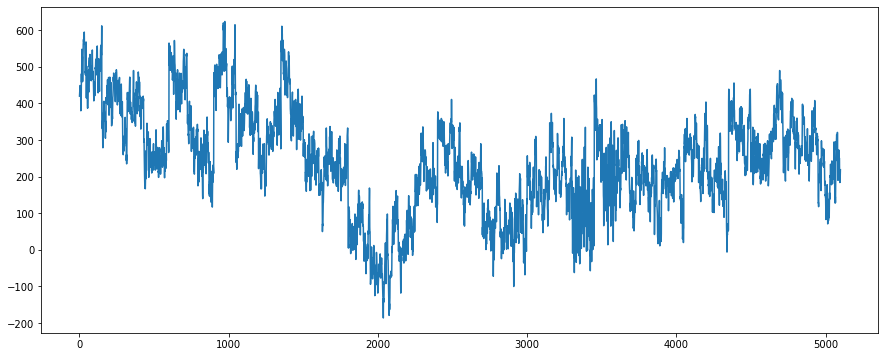

In [ ]:
P3_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    P3_fdt.append(P3[i])
 
print(P3_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3_fdt)

<Figure size 1440x432 with 0 Axes>

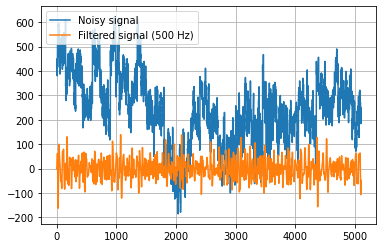

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_fdt, label='Noisy signal')

y4 = butter_bandpass_filter(P3_fdt, lowcut, highcut, fs, order=6)

plt.plot( y4, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y4))

5100


In [ ]:
y4 = np.array(y4)
import statistics

median = np.median(y4)
mean = y4.mean()
var = statistics.variance(y4)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y4)
peak2peak = max(y4)-min(y4)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1696.2241395236326
median =  -0.9564291146675583
mean =  -0.037214529995117644
Standard Deviation =  41.185241768425165
kurtosis =  1.5682063913023407
skewness =  0.07409697037671378
Peak to peak =  301.02896208778577


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y4)

-0.037214529995117644

In [ ]:
#2.median
median = np.median(y4)
median

-0.9564291146675583

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y4)

1696.2241395236326

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y4)

41.185241768425165

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y4)

3.2493604825825857

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y4)

0.07409697037671378

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y4)

301.02896208778577

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y4)

41.181220616639585

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y4)

(array([9.11526981e-01, 5.97262547e-01, 1.44714259e+00, 5.09375087e+01,
        1.50559529e+02, 1.25531602e+02, 9.13179057e+01, 9.33128909e+01,
        5.75078302e+01, 4.12122086e+01, 3.78626370e+01, 5.51274073e+01,
        3.24031450e+01, 2.95434199e+01, 2.45404274e+01, 1.81435066e+01,
        9.95494141e+00, 2.54300061e+00, 1.04844176e+00, 4.09287374e-01,
        1.17897623e-01, 5.31767246e-02, 3.17720544e-02, 2.07881517e-02,
        9.85579018e-03, 5.80744767e-03, 3.92117869e-03, 3.80048146e-03,
        2.93013637e-03, 2.01959030e-03, 2.36453543e-03, 1.83209483e-03,
        1.64401608e-03, 1.59016304e-03, 1.36266972e-03, 1.46393208e-03,
        1.21839833e-03, 1.21482256e-03, 1.15017701e-03, 1.06342214e-03,
        1.01684674e-03, 9.72341993e-04, 9.25865504e-04, 8.76136209e-04,
        8.47347306e-04, 8.04916900e-04, 7.76545844e-04, 7.39064879e-04,
        7.13425048e-04, 6.84084607e-04, 6.60974572e-04, 6.34367348e-04,
        6.15523341e-04, 5.93138006e-04, 5.72117600e-04, 5.556973

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y4, sf=500, method='welch', normalize=True))

0.5053831633467328


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y4))

0.6148490514299114


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y4))

zs = numpy.where(numpy.diff(numpy.sign(y4)))[0]
zs

311


array([  16,   30,   59,   92,  122,  144,  155,  167,  181,  209,  241,
        256,  263,  268,  284,  288,  296,  307,  318,  330,  339,  348,
        374,  390,  396,  404,  414,  420,  435,  451,  463,  480,  507,
        538,  567,  584,  598,  611,  618,  629,  651,  665,  670,  686,
        713,  723,  731,  742,  753,  768,  796,  812,  824,  839,  850,
        860,  871,  881,  895,  928,  953,  988, 1018, 1046, 1057, 1062,
       1079, 1103, 1131, 1142, 1148, 1161, 1166, 1177, 1190, 1204, 1227,
       1255, 1273, 1283, 1295, 1333, 1364, 1381, 1405, 1429, 1444, 1469,
       1479, 1489, 1502, 1519, 1542, 1560, 1576, 1595, 1608, 1623, 1635,
       1644, 1654, 1675, 1690, 1714, 1725, 1736, 1741, 1748, 1757, 1766,
       1779, 1803, 1808, 1817, 1832, 1862, 1885, 1897, 1906, 1921, 1931,
       1939, 1950, 1964, 1980, 2000, 2004, 2014, 2028, 2033, 2042, 2047,
       2060, 2085, 2101, 2125, 2163, 2191, 2223, 2248, 2256, 2273, 2297,
       2322, 2336, 2339, 2353, 2375, 2384, 2395, 24

## **P4 Channel**

[433, 468, 484, 510, 547, 523, 456, 479, 458, 396, 435, 441, 453, 483, 504, 566, 599, 582, 578, 583, 540, 531, 552, 560, 618, 616, 624, 611, 590, 634, 634, 636, 615, 584, 600, 604, 621, 592, 551, 563, 578, 547, 552, 603, 622, 602, 551, 590, 617, 589, 599, 572, 564, 556, 516, 506, 519, 550, 541, 558, 562, 531, 530, 532, 524, 508, 510, 498, 540, 552, 534, 507, 531, 524, 520, 555, 562, 511, 510, 510, 523, 531, 533, 520, 570, 637, 646, 596, 536, 549, 530, 500, 520, 527, 504, 462, 464, 497, 466, 510, 496, 435, 467, 477, 475, 485, 532, 510, 511, 529, 506, 520, 499, 563, 557, 512, 535, 490, 541, 512, 499, 501, 497, 491, 476, 478, 490, 460, 457, 539, 431, 408, 430, 455, 478, 509, 526, 493, 531, 545, 539, 589, 592, 596, 618, 656, 667, 628, 622, 680, 433, 416, 388, 397, 357, 293, 334, 332, 363, 435, 457, 463, 467, 438, 460, 454, 443, 447, 420, 431, 469, 423, 396, 314, 359, 390, 357, 405, 457, 463, 427, 467, 442, 466, 478, 544, 493, 485, 492, 514, 500, 503, 486, 463, 475, 468, 479, 440, 394, 399,

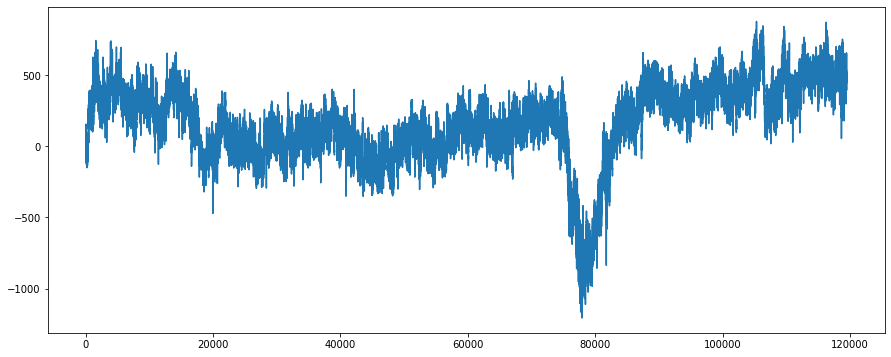

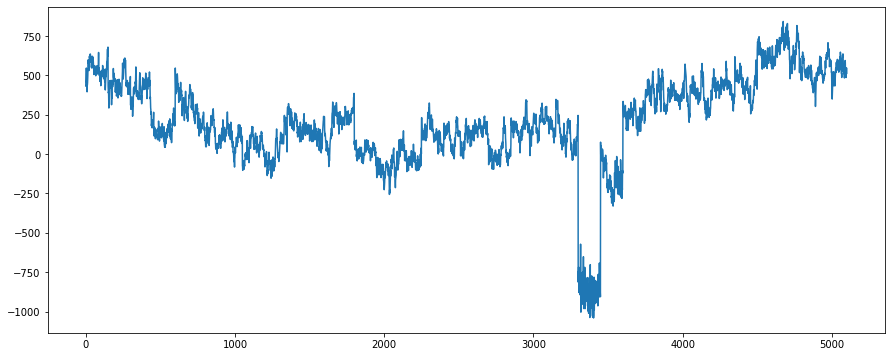

In [ ]:
P4_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    P4_fdt.append(P4[i])
 
print(P4_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4_fdt)

<Figure size 1440x432 with 0 Axes>

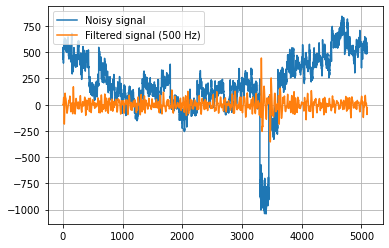

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_fdt, label='Noisy signal')

y5 = butter_bandpass_filter(P4_fdt, lowcut, highcut, fs, order=6)

plt.plot( y5, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y5))

5100


In [ ]:
y5 = np.array(y5)
import statistics

median = np.median(y5)
mean = y5.mean()
var = statistics.variance(y5)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y5)
peak2peak = max(y5)-min(y5)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  3034.044633969033
median =  -0.10064113217109098
mean =  -0.048827808075170176
Standard Deviation =  55.08216257527506
kurtosis =  1.5682063913023407
skewness =  0.29736462010187636
Peak to peak =  799.6541266512918


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y5)

-0.048827808075170176

In [ ]:
#2.median
median = np.median(y5)
median

-0.10064113217109098

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y5)

3034.044633969033

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y5)

55.08216257527506

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y5)

9.577711370647597

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y5)

0.29736462010187636

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y5)

799.6541266512918

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y5)

55.076783742438444

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y5)

(array([3.27587228e+00, 2.51819842e+00, 2.97893137e+00, 8.32178213e+01,
        3.27616595e+02, 1.64702820e+02, 1.18698065e+02, 1.24730197e+02,
        1.37164294e+02, 8.43144501e+01, 7.30915348e+01, 6.66499151e+01,
        4.14878409e+01, 4.22071261e+01, 2.69301393e+01, 2.01421274e+01,
        1.14644091e+01, 3.58993886e+00, 8.97366640e-01, 5.59679399e-01,
        2.29889281e-01, 1.64727333e-01, 5.25359937e-02, 3.47408769e-02,
        2.44419060e-02, 1.83287732e-02, 1.31902570e-02, 1.76515438e-02,
        1.02073765e-02, 1.18744077e-02, 9.43345461e-03, 9.67778523e-03,
        7.50579138e-03, 8.16107764e-03, 6.67948638e-03, 6.72344119e-03,
        6.12457438e-03, 6.02388589e-03, 5.44979284e-03, 5.34343507e-03,
        4.88888868e-03, 4.77526431e-03, 4.45675670e-03, 4.30007182e-03,
        4.04854910e-03, 3.91239000e-03, 3.72754000e-03, 3.58616410e-03,
        3.44266542e-03, 3.31545046e-03, 3.17578813e-03, 3.06264431e-03,
        2.95660131e-03, 2.85428160e-03, 2.75378248e-03, 2.664376

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y5, sf=500, method='welch', normalize=True))

0.4930255443136578


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y5))

0.5647112860677264


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y5))

zs = numpy.where(numpy.diff(numpy.sign(y5)))[0]
zs

279


array([  17,   30,   58,   89,  124,  146,  155,  168,  181,  191,  196,
        212,  236,  253,  261,  281,  300,  323,  339,  354,  374,  389,
        398,  408,  436,  451,  465,  482,  507,  510,  523,  543,  553,
        571,  597,  610,  617,  631,  652,  693,  708,  723,  735,  743,
        751,  767,  797,  812,  827,  841,  850,  860,  871,  874,  894,
        919,  955,  976,  990,  993, 1018, 1035, 1077, 1101, 1129, 1143,
       1150, 1165, 1168, 1174, 1188, 1198, 1221, 1237, 1241, 1252, 1273,
       1279, 1286, 1302, 1318, 1334, 1348, 1358, 1370, 1382, 1394, 1399,
       1410, 1431, 1452, 1485, 1509, 1520, 1524, 1536, 1545, 1556, 1573,
       1584, 1586, 1597, 1605, 1618, 1637, 1674, 1694, 1732, 1758, 1763,
       1775, 1816, 1832, 1862, 1885, 1915, 1937, 1954, 1975, 1999, 2008,
       2011, 2025, 2041, 2061, 2085, 2100, 2129, 2146, 2149, 2162, 2192,
       2214, 2221, 2236, 2258, 2266, 2276, 2304, 2325, 2357, 2375, 2386,
       2397, 2417, 2431, 2470, 2506, 2531, 2569, 25

## **Pz Channel**

[439, 462, 474, 484, 504, 500, 477, 461, 446, 430, 451, 452, 448, 493, 476, 515, 572, 552, 549, 552, 516, 505, 539, 528, 583, 588, 586, 582, 587, 601, 587, 607, 593, 573, 577, 575, 553, 552, 511, 511, 505, 487, 527, 562, 565, 523, 494, 531, 528, 509, 522, 497, 488, 468, 457, 445, 426, 464, 483, 491, 508, 491, 476, 497, 503, 520, 520, 492, 516, 520, 525, 498, 499, 509, 490, 507, 495, 478, 485, 476, 472, 474, 473, 473, 508, 543, 541, 495, 466, 479, 499, 480, 482, 468, 433, 413, 419, 417, 398, 436, 443, 413, 424, 424, 418, 428, 472, 462, 474, 492, 460, 465, 462, 496, 488, 492, 506, 488, 492, 507, 494, 492, 499, 498, 475, 432, 463, 453, 450, 517, 493, 468, 483, 474, 477, 521, 541, 519, 554, 566, 570, 581, 597, 603, 600, 602, 600, 587, 588, 616, 330, 326, 323, 300, 302, 277, 268, 275, 297, 341, 372, 370, 385, 360, 383, 371, 356, 352, 349, 350, 356, 331, 317, 272, 287, 315, 282, 310, 353, 363, 366, 394, 387, 389, 390, 421, 400, 388, 419, 433, 406, 383, 400, 381, 397, 397, 401, 367, 360, 384,

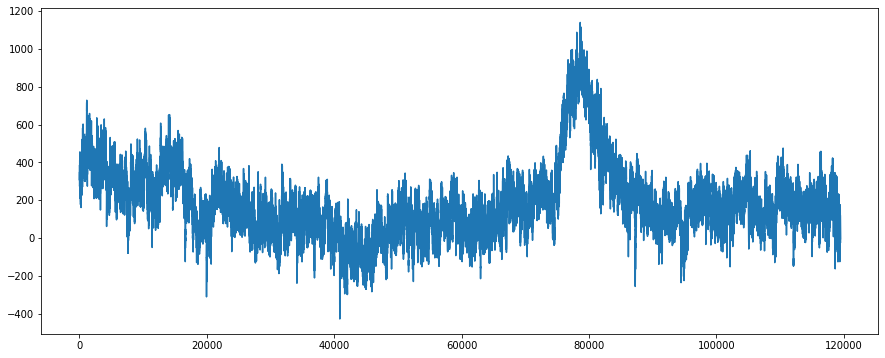

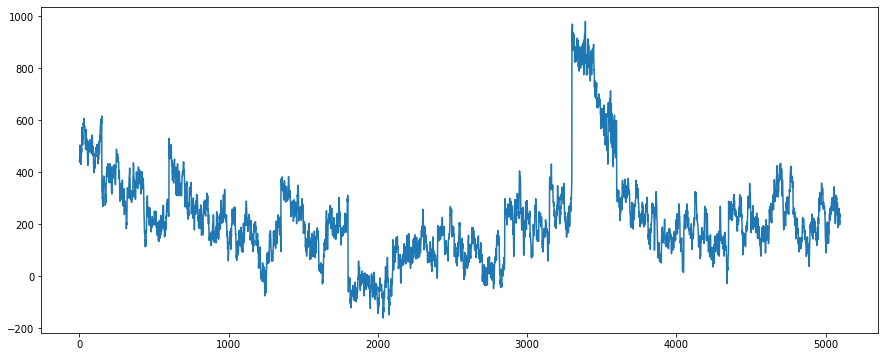

In [ ]:
Pz_fdt = []
for i in range(119495):
  if FDT[i] == 1:
    Pz_fdt.append(Pz[i])
 
print(Pz_fdt)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz_fdt)

<Figure size 1440x432 with 0 Axes>

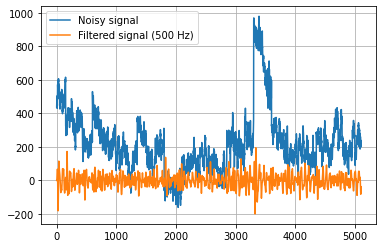

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_fdt, label='Noisy signal')

y6 = butter_bandpass_filter(Pz_fdt, lowcut, highcut, fs, order=6)

plt.plot( y6, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y6))

5100


In [ ]:
y6 = np.array(y6)
import statistics

median = np.median(y6)
mean = y6.mean()
var = statistics.variance(y6)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y6)
peak2peak = max(y6)-min(y6)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1724.099247518753
median =  0.27173256349419667
mean =  -0.035066803284693374
Standard Deviation =  41.52227411304387
kurtosis =  1.5682063913023407
skewness =  0.06725938520476932
Peak to peak =  395.0612945296883


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y6)

-0.035066803284693374

In [ ]:
#2.median
median = np.median(y6)
median

0.27173256349419667

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y6)

1724.099247518753

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y6)

41.52227411304387

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y6)

4.143585924370644

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y6)

0.06725938520476932

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y6)

395.0612945296883

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y6)

41.51821791121895

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y6)

(array([1.08815650e+00, 7.93342312e-01, 1.69656896e+00, 6.09728274e+01,
        2.01320952e+02, 1.18522613e+02, 6.41578018e+01, 5.76641964e+01,
        4.82783093e+01, 4.29384398e+01, 3.43039767e+01, 2.98416214e+01,
        1.89767069e+01, 2.92330243e+01, 2.00044165e+01, 1.45780694e+01,
        7.14622891e+00, 1.64175353e+00, 8.38451399e-01, 3.21293408e-01,
        1.12351175e-01, 3.45694320e-02, 2.85931121e-02, 8.71343629e-03,
        8.79847970e-03, 6.03527174e-03, 3.26760448e-03, 2.83250758e-03,
        2.15367629e-03, 2.37039877e-03, 1.73113417e-03, 1.67426472e-03,
        1.43596461e-03, 1.30308193e-03, 1.34520845e-03, 1.14208004e-03,
        1.06265244e-03, 9.93527941e-04, 9.77039735e-04, 8.96330850e-04,
        8.43069772e-04, 8.03252472e-04, 7.63154841e-04, 7.25377165e-04,
        6.99649681e-04, 6.50603595e-04, 6.28367087e-04, 6.07455385e-04,
        5.76057542e-04, 5.52486085e-04, 5.34184718e-04, 5.10649569e-04,
        4.92553277e-04, 4.75462079e-04, 4.57625062e-04, 4.431368

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y6, sf=500, method='welch', normalize=True))

0.49320728477845466


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y6))

0.5932682081942571


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y6))

zs = numpy.where(numpy.diff(numpy.sign(y6)))[0]
zs

283


array([  17,   30,   58,   91,  123,  146,  155,  166,  181,  210,  240,
        257,  261,  274,  297,  325,  339,  357,  373,  388,  398,  407,
        416,  421,  435,  450,  464,  480,  507,  534,  557,  568,  574,
        583,  597,  610,  618,  630,  651,  681,  707,  721,  733,  744,
        751,  765,  793,  812,  827,  837,  849,  861,  870,  879,  894,
        919,  937,  942,  953,  975,  984,  992, 1018, 1046, 1076, 1100,
       1129, 1141, 1151, 1164, 1167, 1177, 1187, 1199, 1224, 1254, 1274,
       1284, 1292, 1302, 1314, 1333, 1368, 1381, 1406, 1428, 1445, 1470,
       1477, 1487, 1504, 1520, 1529, 1532, 1544, 1560, 1574, 1583, 1587,
       1598, 1606, 1619, 1634, 1664, 1690, 1730, 1742, 1746, 1756, 1764,
       1777, 1804, 1809, 1817, 1832, 1858, 1884, 1898, 1904, 1921, 1930,
       1937, 1951, 1954, 1972, 1997, 2009, 2012, 2025, 2042, 2062, 2085,
       2100, 2127, 2161, 2190, 2222, 2233, 2236, 2265, 2292, 2323, 2353,
       2376, 2387, 2393, 2417, 2432, 2473, 2508, 25